In [1]:
import os
# import pandas as pd 
import polars as pl
# import scanpy as sc
import numpy as np
import typing as tp
import re
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline
import os, shutil, glob
import seaborn as sns; sns.set_style("white")
import umap as umap
# import pacmap as umap
# import hdbscan as hdb

# import plotnine as gg
# from cytominer_eval import evaluate

os.getcwd()

2024-10-24 16:47:41.811677: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'/share/data/analyses/christa/colopaint3D/spher_colo52_v1'

In [2]:
print(os.getcwd())
os.chdir('/scratch2-shared/david/colopaint3D/python/data/')
print(os.getcwd())

/share/data/analyses/christa/colopaint3D/spher_colo52_v1
/scratch2-shared/david/colopaint3D/python/data


In [3]:
# Set up the plotting parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
dpi = 300
figformat = 'pdf'

In [4]:
# fig.savefig(
#         "Detected_Cells_Spheroid_{}_{}_{}.{}".format(cell_line,well,barcode,figformat), dpi=dpi, bbox_inches="tight"
#         )

# plt.show()

In [5]:

dpi = 300
statarg = 'single'
OutputDir = f'./share/data/analyses/christa/colopaint3D/spher_colo52_v1'
if not os.path.exists(OutputDir): 
    os.makedirs(OutputDir)
feat_bk = '1_FeaturesImages_meanstd_noslice_PerPlate'
feat_pp = '1_FeaturesImages_meanstd_PerPlate'
feat_sl = '1_FeaturesImages_meanstd'
# feat_agg = '/share/data/analyses/christa/colopaint3D/spher_colo52_v1'

# feat_pp = './old_features3/1_FeaturesImages_meanstd_PerPlate'
# feat_fe = './old_features3/1_FeaturesImages_meanstd'


In [6]:

filenames = ['SingleSlice/HCT116_Slices_medianAgg', 'SingleSlice/HT29_Slices_medianAgg']

statmet = 'SingleSlice'

statmets = ['SingleCell', 'Aggregates']

dropcols = ['Nuclei_Location_Center_X',
            'Nuclei_Location_Center_Y',
            'Location',
            'ImageNumber_',
            'Parent',
            'Children',
            '_ObjectNumber',
            '_Object_Number',
            '_Y',
            '_X' 
            ]


cons = ['pos_con', 'neg_con']
nodmso = ['trt']
wdmso = ['pos_con']
float_columns=[pl.col(pl.Float32),pl.col(pl.Float64)]
str_columns = [pl.col(pl.String)]
str_columns = [pl.col(pl.Int64),pl.col(pl.Int32)]
feat_sc = f'{feat_pp}/{statmet}'
ignore_labels = ['water','water+','flup','dmso']
frac_wells = 0.15


In [7]:
# cmap = {'MAPK': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
#         'Cell Cycle': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
#         'DNA Damage': (1.0, 0.4980392156862745, 0.054901960784313725),
#         'PI3K/Akt/mTOR': (1.0, 0.7333333333333333, 0.47058823529411764),
#         'Epigenetics': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
#         'Stem Cells & Wnt': (0.596078431372549,
#         0.8745098039215686,
#         0.5411764705882353),
#         'Angiogenesis': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
#         'Protein Tyrosine Kinase': (1.0, 0.596078431372549, 0.5882352941176471),
#         'Apoptosis': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
#         'JAK/STAT': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
#         'Cytoskeletal Signaling': (0.5490196078431373,
#         0.33725490196078434,
#         0.29411764705882354),
#         'TGF-beta/Smad': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
#         'Others': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
#         'Proteases': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)}

In [32]:
df1

Metadata_Barcode,Metadata_Well,Nuclei_RadialDistribution_ZernikePhase_CONC_8_4,Nuclei_Intensity_MeanIntensity_CONC,Cytoplasm_RadialDistribution_ZernikeMagnitude_MITO_2_2,Nuclei_AreaShape_BoundingBoxMinimum_Y,Nuclei_RadialDistribution_ZernikePhase_SYTO_9_7,Nuclei_Granularity_4_CONC,Cells_RadialDistribution_ZernikePhase_MITO_6_0,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_6,Cells_RadialDistribution_ZernikeMagnitude_MITO_7_1,Nuclei_Intensity_MinIntensityEdge_HOECHST,Cells_RadialDistribution_MeanFrac_CONC_Overflow,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_4,Cytoplasm_AreaShape_Zernike_3_1,Cytoplasm_Correlation_Overlap_HOECHST_SYTO,Cytoplasm_Intensity_MinIntensityEdge_CONC,Cells_RadialDistribution_ZernikePhase_SYTO_8_6,Cytoplasm_RadialDistribution_ZernikePhase_PHAandWGA_7_7,Nuclei_Correlation_Costes_MITO_PHAandWGA,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_7_1,Cells_Intensity_MaxIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_6_0,Cells_RadialDistribution_ZernikePhase_CONC_4_4,Cells_Correlation_Costes_HOECHST_PHAandWGA,Cytoplasm_Intensity_MinIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_CONC_2_0,Cells_Correlation_Manders_PHAandWGA_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_SYTO_8_6,Cells_RadialDistribution_ZernikePhase_HOECHST_5_5,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_3_3,Cytoplasm_RadialDistribution_ZernikeMagnitude_SYTO_6_2,Cytoplasm_Granularity_16_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_3_1,Nuclei_Intensity_UpperQuartileIntensity_MITO,Cytoplasm_AreaShape_Zernike_7_3,Cytoplasm_RadialDistribution_ZernikePhase_SYTO_4_4,…,Metadata_cmpd_barcode,Cytoplasm_FileName_MITO,Cytoplasm_FileName_PHAandWGA,Cells_Metadata_AcqID,Cells_FileName_MITO,Cytoplasm_AreaShape_BoundingBoxMinimum_X,Cytoplasm_PathName_HOECHST,Metadata_cmpd_target_type,Cytoplasm_AreaShape_Area,Cells_FileName_HOECHST,Nuclei_PathName_PHAandWGA,Cytoplasm_PathName_PHAandWGA,Cytoplasm_FileName_SYTO,Cells_PathName_SYTO,Cytoplasm_FileName_CONC,Cytoplasm_AreaShape_EulerNumber,Cells_PathName_PHAandWGA,Cytoplasm_PathName_MITO,Cells_FileName_CONC,Cells_Parent_nuclei,Metadata_cmpd_target,Cells_PathName_CONC,Metadata_Site,Nuclei_FileName_HOECHST,Metadata_cmpd_cell_line,Nuclei_PathName_MITO,Cytoplasm_FileName_HOECHST,Nuclei_FileName_PHAandWGA,Cells_PathName_MITO,Nuclei_FileName_SYTO,Cells_Parent_cells,Cytoplasm_Location_Center_Z,Cytoplasm_PathName_CONC,Nuclei_PathName_HOECHST,Cytoplasm_AreaShape_BoundingBoxArea,Metadata_onehot,Metadata_semi
str,str,f32,f32,f32,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,str,str,str,i32,str,i32,str,str,i32,str,str,str,str,str,str,i32,str,str,str,i32,str,str,i32,str,str,str,str,str,str,str,i32,i32,str,str,i32,i64,i64
"""PB000137""","""M11""",0.298972,0.012486,0.005489,500.0,-0.009839,0.362036,-1.570796,1.043144,0.003932,0.010529,0.0,0.307847,0.01905,0.998735,0.010666,0.792261,0.722381,1.0,0.000073,0.158923,-1.570796,-0.543721,1.0,0.129595,0.002119,1.0,0.000403,-1.242339,0.000211,0.00048,0.673473,0.405405,0.154116,0.004039,-1.227436,…,"""PB000137""","""Well-M11-z0-MI…","""Well-M11-z0-PH…",4185,"""Well-M11-z0-MI…",397,"""/share/mikro2/…","""Targeted""",4768,"""Well-M11-z0-HO…",null,"""/share/mikro2/…","""Well-M11-z0-SY…","""/share/mikro2/…","""Well-M11-z0-CO…",1,"""/share/mikro2/…","""/share/mikro2/…","""Well-M11-z0-CO…",1,"""Bcl-2,Autophag…","""/share/mikro2/…",0,null,"""HCT116""",null,"""Well-M11-z0-HO…",null,"""/share/mikro2/…",null,1,0,"""/share/mikro2/…",null,6156,12,12
"""PB000137""","""D07""",0.655999,0.014804,0.011842,405.0,-0.060122,0.316482,-1.570796,-0.538098,0.009989,0.007691,0.0,0.326972,0.015594,0.996313,0.01181,-1.248679,-0.074852,1.0,0.000079,0.242145,0.0,1.808392,1.0,0.17293,0.00276,1.0,0.000259,-0.486822,0.000144,0.000561,0.0,-0.760331,0.21355,0.005206,1.601382,…,"""PB000137""","""Well-D07-z0-MI…","""Well-D07-z0-PH…",4185,"""Well-D07-z0-MI…",429,"""/share/mikro2/…","""Target

In [40]:
df3.sort(['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']) == df1.sort(['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site'])

Metadata_Barcode,Metadata_Well,Nuclei_RadialDistribution_ZernikePhase_CONC_8_4,Nuclei_Intensity_MeanIntensity_CONC,Cytoplasm_RadialDistribution_ZernikeMagnitude_MITO_2_2,Nuclei_AreaShape_BoundingBoxMinimum_Y,Nuclei_RadialDistribution_ZernikePhase_SYTO_9_7,Nuclei_Granularity_4_CONC,Cells_RadialDistribution_ZernikePhase_MITO_6_0,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_6,Cells_RadialDistribution_ZernikeMagnitude_MITO_7_1,Nuclei_Intensity_MinIntensityEdge_HOECHST,Cells_RadialDistribution_MeanFrac_CONC_Overflow,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_4,Cytoplasm_AreaShape_Zernike_3_1,Cytoplasm_Correlation_Overlap_HOECHST_SYTO,Cytoplasm_Intensity_MinIntensityEdge_CONC,Cells_RadialDistribution_ZernikePhase_SYTO_8_6,Cytoplasm_RadialDistribution_ZernikePhase_PHAandWGA_7_7,Nuclei_Correlation_Costes_MITO_PHAandWGA,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_7_1,Cells_Intensity_MaxIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_6_0,Cells_RadialDistribution_ZernikePhase_CONC_4_4,Cells_Correlation_Costes_HOECHST_PHAandWGA,Cytoplasm_Intensity_MinIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_CONC_2_0,Cells_Correlation_Manders_PHAandWGA_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_SYTO_8_6,Cells_RadialDistribution_ZernikePhase_HOECHST_5_5,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_3_3,Cytoplasm_RadialDistribution_ZernikeMagnitude_SYTO_6_2,Cytoplasm_Granularity_16_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_3_1,Nuclei_Intensity_UpperQuartileIntensity_MITO,Cytoplasm_AreaShape_Zernike_7_3,Cytoplasm_RadialDistribution_ZernikePhase_SYTO_4_4,…,Metadata_cmpd_barcode,Cytoplasm_FileName_MITO,Cytoplasm_FileName_PHAandWGA,Cells_Metadata_AcqID,Cells_FileName_MITO,Cytoplasm_AreaShape_BoundingBoxMinimum_X,Cytoplasm_PathName_HOECHST,Metadata_cmpd_target_type,Cytoplasm_AreaShape_Area,Cells_FileName_HOECHST,Nuclei_PathName_PHAandWGA,Cytoplasm_PathName_PHAandWGA,Cytoplasm_FileName_SYTO,Cells_PathName_SYTO,Cytoplasm_FileName_CONC,Cytoplasm_AreaShape_EulerNumber,Cells_PathName_PHAandWGA,Cytoplasm_PathName_MITO,Cells_FileName_CONC,Cells_Parent_nuclei,Metadata_cmpd_target,Cells_PathName_CONC,Metadata_Site,Nuclei_FileName_HOECHST,Metadata_cmpd_cell_line,Nuclei_PathName_MITO,Cytoplasm_FileName_HOECHST,Nuclei_FileName_PHAandWGA,Cells_PathName_MITO,Nuclei_FileName_SYTO,Cells_Parent_cells,Cytoplasm_Location_Center_Z,Cytoplasm_PathName_CONC,Nuclei_PathName_HOECHST,Cytoplasm_AreaShape_BoundingBoxArea,Metadata_onehot,Metadata_semi
bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,…,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,null,true,true,true,true,true,true,true,true,true,true,true,true,null,true,null,true,null,true,null,true,true,true,null,true,false,false
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,null,true,true,true,true,true,true,true,true,true,true,true,true,null,true,null,true,null,true,null,true,true,true,null,true,false,false
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,null,true,true,true,true,true,true,true,true,true,true,true,true,null,true,null,true,null,true,null,true,true,true,null,true,false,false


In [41]:
df1.sort(['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site'])

Metadata_Barcode,Metadata_Well,Nuclei_RadialDistribution_ZernikePhase_CONC_8_4,Nuclei_Intensity_MeanIntensity_CONC,Cytoplasm_RadialDistribution_ZernikeMagnitude_MITO_2_2,Nuclei_AreaShape_BoundingBoxMinimum_Y,Nuclei_RadialDistribution_ZernikePhase_SYTO_9_7,Nuclei_Granularity_4_CONC,Cells_RadialDistribution_ZernikePhase_MITO_6_0,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_6,Cells_RadialDistribution_ZernikeMagnitude_MITO_7_1,Nuclei_Intensity_MinIntensityEdge_HOECHST,Cells_RadialDistribution_MeanFrac_CONC_Overflow,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_4,Cytoplasm_AreaShape_Zernike_3_1,Cytoplasm_Correlation_Overlap_HOECHST_SYTO,Cytoplasm_Intensity_MinIntensityEdge_CONC,Cells_RadialDistribution_ZernikePhase_SYTO_8_6,Cytoplasm_RadialDistribution_ZernikePhase_PHAandWGA_7_7,Nuclei_Correlation_Costes_MITO_PHAandWGA,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_7_1,Cells_Intensity_MaxIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_6_0,Cells_RadialDistribution_ZernikePhase_CONC_4_4,Cells_Correlation_Costes_HOECHST_PHAandWGA,Cytoplasm_Intensity_MinIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_CONC_2_0,Cells_Correlation_Manders_PHAandWGA_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_SYTO_8_6,Cells_RadialDistribution_ZernikePhase_HOECHST_5_5,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_3_3,Cytoplasm_RadialDistribution_ZernikeMagnitude_SYTO_6_2,Cytoplasm_Granularity_16_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_3_1,Nuclei_Intensity_UpperQuartileIntensity_MITO,Cytoplasm_AreaShape_Zernike_7_3,Cytoplasm_RadialDistribution_ZernikePhase_SYTO_4_4,…,Metadata_cmpd_barcode,Cytoplasm_FileName_MITO,Cytoplasm_FileName_PHAandWGA,Cells_Metadata_AcqID,Cells_FileName_MITO,Cytoplasm_AreaShape_BoundingBoxMinimum_X,Cytoplasm_PathName_HOECHST,Metadata_cmpd_target_type,Cytoplasm_AreaShape_Area,Cells_FileName_HOECHST,Nuclei_PathName_PHAandWGA,Cytoplasm_PathName_PHAandWGA,Cytoplasm_FileName_SYTO,Cells_PathName_SYTO,Cytoplasm_FileName_CONC,Cytoplasm_AreaShape_EulerNumber,Cells_PathName_PHAandWGA,Cytoplasm_PathName_MITO,Cells_FileName_CONC,Cells_Parent_nuclei,Metadata_cmpd_target,Cells_PathName_CONC,Metadata_Site,Nuclei_FileName_HOECHST,Metadata_cmpd_cell_line,Nuclei_PathName_MITO,Cytoplasm_FileName_HOECHST,Nuclei_FileName_PHAandWGA,Cells_PathName_MITO,Nuclei_FileName_SYTO,Cells_Parent_cells,Cytoplasm_Location_Center_Z,Cytoplasm_PathName_CONC,Nuclei_PathName_HOECHST,Cytoplasm_AreaShape_BoundingBoxArea,Metadata_onehot,Metadata_semi
str,str,f32,f32,f32,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,str,str,str,i32,str,i32,str,str,i32,str,str,str,str,str,str,i32,str,str,str,i32,str,str,i32,str,str,str,str,str,str,str,i32,i32,str,str,i32,i64,i64
"""PB000137""","""B02""",1.859756,0.007457,0.008142,439.0,-0.085652,1.70318,-1.570796,1.350673,0.006976,0.004303,0.0,0.374085,0.019354,0.998008,0.006241,-0.799081,0.286359,1.0,0.000085,0.150851,1.570796,-0.132102,1.0,0.118624,0.001661,1.0,0.000076,-1.410076,0.000137,0.000296,1.247042,0.590128,0.138018,0.005839,-0.359074,…,"""PB000137""","""Well-B02-z1-MI…","""Well-B02-z1-PH…",4185,"""Well-B02-z1-MI…",421,"""/share/mikro2/…","""Targeted""",4431,"""Well-B02-z1-HO…",null,"""/share/mikro2/…","""Well-B02-z1-SY…","""/share/mikro2/…","""Well-B02-z1-CO…",1,"""/share/mikro2/…","""/share/mikro2/…","""Well-B02-z1-CO…",1,"""MEK""","""/share/mikro2/…",1,null,"""HCT116""",null,"""Well-B02-z1-HO…",null,"""/share/mikro2/…",null,1,0,"""/share/mikro2/…",null,6396,11,-1
"""PB000137""","""B02""",-0.937459,0.007712,0.007544,438.0,-0.855846,1.429514,1.570796,0.613525,0.007444,0.004448,0.0,0.694632,0.010252,0.99778,0.00618,0.250366,-0.917409,1.0,0.000072,0.15198,1.570796,-0.987781,1.0,0.128771,0.001565,1.0,0.000133,-1.24603,0.000168,0.000235,1.157906,-1.199848,0.143343,0.010689,-1.281259,…,"""PB000137""","""Well-B02-z2-MI…","""Well-B02-z2-PH…",4185,"""Well-B02-z2-MI…",478,"""/share/mikro2/…","""Targe

In [42]:
df3.sort(['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site'])

Metadata_Barcode,Metadata_Well,Nuclei_RadialDistribution_ZernikePhase_CONC_8_4,Nuclei_Intensity_MeanIntensity_CONC,Cytoplasm_RadialDistribution_ZernikeMagnitude_MITO_2_2,Nuclei_AreaShape_BoundingBoxMinimum_Y,Nuclei_RadialDistribution_ZernikePhase_SYTO_9_7,Nuclei_Granularity_4_CONC,Cells_RadialDistribution_ZernikePhase_MITO_6_0,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_6,Cells_RadialDistribution_ZernikeMagnitude_MITO_7_1,Nuclei_Intensity_MinIntensityEdge_HOECHST,Cells_RadialDistribution_MeanFrac_CONC_Overflow,Cytoplasm_RadialDistribution_ZernikePhase_CONC_6_4,Cytoplasm_AreaShape_Zernike_3_1,Cytoplasm_Correlation_Overlap_HOECHST_SYTO,Cytoplasm_Intensity_MinIntensityEdge_CONC,Cells_RadialDistribution_ZernikePhase_SYTO_8_6,Cytoplasm_RadialDistribution_ZernikePhase_PHAandWGA_7_7,Nuclei_Correlation_Costes_MITO_PHAandWGA,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_7_1,Cells_Intensity_MaxIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_6_0,Cells_RadialDistribution_ZernikePhase_CONC_4_4,Cells_Correlation_Costes_HOECHST_PHAandWGA,Cytoplasm_Intensity_MinIntensityEdge_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_CONC_2_0,Cells_Correlation_Manders_PHAandWGA_MITO,Nuclei_RadialDistribution_ZernikeMagnitude_SYTO_8_6,Cells_RadialDistribution_ZernikePhase_HOECHST_5_5,Cytoplasm_RadialDistribution_ZernikeMagnitude_HOECHST_3_3,Cytoplasm_RadialDistribution_ZernikeMagnitude_SYTO_6_2,Cytoplasm_Granularity_16_MITO,Nuclei_RadialDistribution_ZernikePhase_CONC_3_1,Nuclei_Intensity_UpperQuartileIntensity_MITO,Cytoplasm_AreaShape_Zernike_7_3,Cytoplasm_RadialDistribution_ZernikePhase_SYTO_4_4,…,Metadata_cmpd_barcode,Cytoplasm_FileName_MITO,Cytoplasm_FileName_PHAandWGA,Cells_Metadata_AcqID,Cells_FileName_MITO,Cytoplasm_AreaShape_BoundingBoxMinimum_X,Cytoplasm_PathName_HOECHST,Metadata_cmpd_target_type,Cytoplasm_AreaShape_Area,Cells_FileName_HOECHST,Nuclei_PathName_PHAandWGA,Cytoplasm_PathName_PHAandWGA,Cytoplasm_FileName_SYTO,Cells_PathName_SYTO,Cytoplasm_FileName_CONC,Cytoplasm_AreaShape_EulerNumber,Cells_PathName_PHAandWGA,Cytoplasm_PathName_MITO,Cells_FileName_CONC,Cells_Parent_nuclei,Metadata_cmpd_target,Cells_PathName_CONC,Metadata_Site,Nuclei_FileName_HOECHST,Metadata_cmpd_cell_line,Nuclei_PathName_MITO,Cytoplasm_FileName_HOECHST,Nuclei_FileName_PHAandWGA,Cells_PathName_MITO,Nuclei_FileName_SYTO,Cells_Parent_cells,Cytoplasm_Location_Center_Z,Cytoplasm_PathName_CONC,Nuclei_PathName_HOECHST,Cytoplasm_AreaShape_BoundingBoxArea,Metadata_onehot,Metadata_semi
str,str,f32,f32,f32,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,str,str,str,i32,str,i32,str,str,i32,str,str,str,str,str,str,i32,str,str,str,i32,str,str,i32,str,str,str,str,str,str,str,i32,i32,str,str,i32,i64,i64
"""PB000137""","""B02""",1.859756,0.007457,0.008142,439.0,-0.085652,1.70318,-1.570796,1.350673,0.006976,0.004303,0.0,0.374085,0.019354,0.998008,0.006241,-0.799081,0.286359,1.0,0.000085,0.150851,1.570796,-0.132102,1.0,0.118624,0.001661,1.0,0.000076,-1.410076,0.000137,0.000296,1.247042,0.590128,0.138018,0.005839,-0.359074,…,"""PB000137""","""Well-B02-z1-MI…","""Well-B02-z1-PH…",4185,"""Well-B02-z1-MI…",421,"""/share/mikro2/…","""Targeted""",4431,"""Well-B02-z1-HO…",null,"""/share/mikro2/…","""Well-B02-z1-SY…","""/share/mikro2/…","""Well-B02-z1-CO…",1,"""/share/mikro2/…","""/share/mikro2/…","""Well-B02-z1-CO…",1,"""MEK""","""/share/mikro2/…",1,null,"""HCT116""",null,"""Well-B02-z1-HO…",null,"""/share/mikro2/…",null,1,0,"""/share/mikro2/…",null,6396,4,4
"""PB000137""","""B02""",-0.937459,0.007712,0.007544,438.0,-0.855846,1.429514,1.570796,0.613525,0.007444,0.004448,0.0,0.694632,0.010252,0.99778,0.00618,0.250366,-0.917409,1.0,0.000072,0.15198,1.570796,-0.987781,1.0,0.128771,0.001565,1.0,0.000133,-1.24603,0.000168,0.000235,1.157906,-1.199848,0.143343,0.010689,-1.281259,…,"""PB000137""","""Well-B02-z2-MI…","""Well-B02-z2-PH…",4185,"""Well-B02-z2-MI…",478,"""/share/mikro2/…","""Targete

In [8]:
def readData(filename, feat_dir, statmet='SingleCell', filetype='parquet'):
    if filetype=='parquet':
        df = pl.read_parquet(f'{feat_dir}/{filename}.parquet')
    elif filetype=='csv':
        df = pl.read_csv(f'{feat_dir}/{filename}.csv')
    
    #Ensuring no NaN labels exist for Pathways
    df = replace_nan_labels(df)

    ##This here is important!!!!!!
    # df=df.select([c for c in df.columns if not is_meta_column(c)])
    # dataNpy = df.to_numpy(df.select(float_columns))
    ##
    df = df.filter(~pl.col('Metadata_cmpd_pathway').is_in(ignore_labels))
    df = df.filter(~pl.col('Metadata_cmpd_pert_type').is_in(cons))
    onehot_list = df.select(['Metadata_cmpd_pathway'])['Metadata_cmpd_pathway'].unique().to_list()
    onehot_mapping = {name: i for i, name in enumerate(onehot_list)}
    df = df.with_columns(df['Metadata_cmpd_pathway'].map_elements(lambda name: oneHot(name, onehot_mapping)).alias('Metadata_onehot'))
    

    df = df.with_columns(
    pl.when(
        pl.col("Metadata_onehot").map_elements(lambda s: np.random.rand() < frac_wells)
    )
    .then(-1)
    .otherwise(pl.col("Metadata_onehot"))
    .alias("Metadata_semi")
    )

    return df

def replace_nan_labels(df):
    df = df.with_columns(
    pl.when(pl.col('Metadata_cmpd_pathway').is_null())
      .then(pl.col('Metadata_cmpd_cmpdname'))
      .otherwise(pl.col('Metadata_cmpd_pathway'))
      .alias('Metadata_cmpd_pathway')
    )
    return df

def modify_half_of_each_class(group):
    # Sample 50% of the rows from the group
    sample_size = int(group.shape[0] * 0.5)
    sampled_indices = np.random.choice(group.shape[0], size=sample_size, replace=False)
    
    # Set those rows to -1
    group = group.with_columns(
        pl.when(pl.Series(np.isin(np.arange(group.shape[0]), sampled_indices)))
        .then(-1)
        .otherwise(pl.col("Metadata_onehot"))
        .alias("Metadata_semi")
    )
    return group


# this is code from Dan
def is_meta_column(
    c:str,
    allowlist:tp.List[str]=["Metadata_AcqID","Metadata_Site"],
    denylist:tp.List[str]=["Metadata_Well","Metadata_barcode"],
)->bool:
    """
        allowlist:
            the function will return False for these, no matter if they are metadata or not
        denylist:
            the function will return True for these, no matter if they are metadata or not
    """
    if c in allowlist:
        return False
    if c in denylist:
        return True
    for ex in '''
        Metadata
        Plate
        Well
    '''.split():
        if re.search(ex, c):
            return True
    return False


def oneHot(row, mapping):
    return mapping.get(row, -1)

def makePCA(df, cmap,name='', n_components=2):
    dataN=df.select([c for c in df.columns if not is_meta_column(c)]).select(float_columns).to_numpy()
    pca_model = PCA(n_components=n_components)
    pca_model = pca_model.fit(dataN)
    pcaOut = pca_model.transform(dataN)
    df = df.with_columns([
    pl.Series('pc1', pcaOut[:, 0]),  
    pl.Series('pc2', pcaOut[:, 1])   
    ])

    hue = df['Metadata_Site'].to_list()
    # cmap = sns.color_palette("tab20", n_colors=len(df['Metadata_pathway'].unique().to_list()))
    # cmap = cmap
    fig = plt.figure(
    # figsize=[14, 5]
    )
    ax = fig.add_subplot(111)
    ax.set_xlabel('PC 1', fontsize = 10)
    ax.set_ylabel('PC 2', fontsize = 10)
    ax.spines['top'].set_color('w')
    ax.spines['right'].set_color('w')
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    sns.scatterplot(x=df['pc1'].to_list(),
                    y=df['pc2'].to_list(),
                    palette=cmap, hue=hue,
                    marker='.',
                    ).set(title=f'PCA {name} All'
                )
    ax.set_facecolor('w')
    ax.get_legend().remove()
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    plt.close()
    return ax, df

def makeUMAP(df, cmap, name='', statmet='SingleCell', nn = 200, sup_mode=True, n_components=100, min_dist=0.1, spread= 1, n_epochs=None, metric='cosine', use_pca=True, random_state=42):
    if sup_mode=='traintest':
        dfN = df.filter(pl.col('Metadata_semi')!=-1)
        dfY = df.filter(pl.col('Metadata_semi')==-1)
        dataN=dfN.select([c for c in dfN.columns if not is_meta_column(c)]).select(float_columns).to_numpy()
        dataY=dfY.select([c for c in dfN.columns if not is_meta_column(c)]).select(float_columns).to_numpy()
    else:
        dataN=df.select([c for c in df.columns if not is_meta_column(c)]).select(float_columns).to_numpy()

    umap_model = umap.UMAP(n_neighbors=nn
                        , min_dist=min_dist
                        , spread= spread
                        , n_epochs=n_epochs
                        , metric=metric
                        , n_jobs=-1
                        , random_state=random_state
                        )
    # umap_model = umap.PaCMAP(n_components=2,MN_ratio=0.5, FP_ratio=2.0, distance='angular')
    if sup_mode=='traintest':
        umapOut = umap_model.fit_transform(dataN, y=dfN['Metadata_onehot'].to_list())
        umapPred = umap_model.transform(dataY)
        dfN = dfN.with_columns([
        pl.Series('umap1', umapOut[:, 0]),  
        pl.Series('umap2', umapOut[:, 1])   
        ])
        dfY = dfY.with_columns([
        pl.Series('umap1', umapPred[:, 0]),  
        pl.Series('umap2', umapPred[:, 1])   
        ])
        df = pl.concat([dfN, dfY])
        isSup = 'Semi-Supervised train-test'
    else:
        if use_pca:
            pca_model = PCA(n_components=n_components)
            pca_model = pca_model.fit(dataN)
            dataN = pca_model.transform(dataN)
        if sup_mode=='supervised':
            umapOut = umap_model.fit_transform(dataN, y=df['Metadata_onehot'].to_list())
            isSup = 'Supervised'
        elif sup_mode=='semi':
            umapOut = umap_model.fit_transform(dataN, y=df['Metadata_semi'].to_list())
            isSup = 'Semi-Supervised with partial labeling'
        else:
            umapOut = umap_model.fit_transform(dataN)
            isSup = 'Unsupervised'
        df = df.with_columns([
        pl.Series('umap1', umapOut[:, 0]),  
        pl.Series('umap2', umapOut[:, 1])   
        ])

    
    # cmap = sns.color_palette("tab20", n_colors=len(df['Metadata_pathway'].unique().to_list()))

    fig = plt.figure(
    # figsize=[14, 5]
    )
    ax = fig.add_subplot()
    ax.set_xlabel('UMAP 1', fontsize = 10)
    ax.set_ylabel('UMAP 2', fontsize = 10)
    ax.spines['top'].set_color('w')
    ax.spines['right'].set_color('w')
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    if sup_mode == 'supervised' or sup_mode == 'unsupervised':
        hue = df['Metadata_Site'].to_list()
        sns.scatterplot(x=df['umap1'].to_list(),
                        y=df['umap2'].to_list(),
                        palette=cmap, hue=hue,
                        marker='.',
                        ).set(title=f'umap {df.select(pl.col("Metadata_cell_line")).unique().item(0, 0)} {sup_mode}'
                    )
    else:
        df_s1 = df.filter(pl.col('Metadata_semi')!=-1)
        df_s1 = df_s1.select(pl.col(['umap1', 'umap2','Metadata_cmpd_pathway', 'Metadata_onehot', 'Metadata_semi']))
        hue = df_s1['Metadata_Site'].to_list()
        sns.scatterplot(x=df_s1['umap1'].to_list(),
                        y=df_s1['umap2'].to_list(),
                        palette=cmap, hue=hue,
                        marker='.',
                        ax=ax
                        ).set(title=f'umap {df.select(pl.col("Metadata_cell_line")).unique().item(0, 0)} {sup_mode}'
                    )
        df_s2 = df.filter(pl.col('Metadata_semi')==-1)
        df_s2 = df_s2.select(pl.col(['umap1', 'umap2','Metadata_cmpd_pathway', 'Metadata_onehot', 'Metadata_semi']))
        hue = df_s2['Metadata_Site'].to_list()
        sns.scatterplot(x=df_s2['umap1'].to_list(),
                        y=df_s2['umap2'].to_list(),
                        palette=cmap, hue=hue,
                        marker='o',
                        ax=ax,
                        s=30, alpha=0.7
                        ).set(title=f'umap {df.select(pl.col("Metadata_cell_line")).unique().item(0, 0)} {sup_mode}'
                    )

    ax.set_facecolor('w')
    ax.get_legend().remove()
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # if not os.path.exists(f'{OutputDir}/{statmet}'):
    #     os.makedirs(f'{OutputDir}/{statmet}')
    # plt.savefig(f'{OutputDir}/{statmet}/{name}_umap{nn}nn_{isSup}.png')
    plt.show()
    plt.close()
    return ax, df

def filter_and_clean(df):
    df_3d = scrub(df.filter(pl.col('Metadata_data_type')=='aggregates'))
    # print(df_3d.head(), df.head())
    df_2d = scrub(df.filter(pl.col('Metadata_data_type')=='2D'))
    df_mip = scrub(df.filter(pl.col('Metadata_data_type')=='MIP'))
    return df_3d, df_2d, df_mip

def scrub(df):
    float_columns=[pl.col(pl.Float32),pl.col(pl.Float64)]
    df_floats=df.select([c for c in df.columns if not is_meta_column(c)]).select(float_columns)

    df_bool = df_floats.select(pl.all().is_nan().all())
    cols_to_drop = [col for col, is_all_nan in zip(df_floats.columns, df_bool.row(0)) if is_all_nan] 
    df = df.drop(cols_to_drop)

    #Checking if NaNs remains after column scrubbing
    df_floats=df.select([c for c in df.columns if not is_meta_column(c)]).select(float_columns)
    has_nan = df_floats.select(pl.all().is_nan().any()).row(0)[0]
    print(f'Has NaNs after column scrubbing:  {has_nan}')
    num_rows_before_nan_trim = df.shape[0]
    if has_nan:
        for col in df.select([pl.col(pl.Float32),pl.col(pl.Float64)]).columns:
            before_drop=df.shape[0]
            df=df.filter(pl.col(col).is_not_null())
            after_drop=df.shape[0]

            num_values_dropped=before_drop-after_drop
            if num_values_dropped>0:
                print(f"dropped {num_values_dropped} rows due to NaNs in column {col}")
        #Checking if NaNs remains after row scrubbing
        df_floats=df.select([c for c in df.columns if not is_meta_column(c)]).select(float_columns)
        has_nan = df_floats.select(pl.all().is_nan().any()).row(0)[0]
        print(f'Has NaNs after row scrubbing:  {has_nan}')
    return df


In [9]:
filename1 = filenames[0]
# df = pl.read_parquet(f'{feat_pp}/{filename}.parquet')
df1 = readData(filename1, feat_dir=feat_bk, filetype='parquet')
cmap = sns.color_palette("YlOrRd", n_colors=len(df1['Metadata_Site'].unique().to_list()))
# df['Metadata_cmpd_pathway'].unique().to_list()

/tmp/ipykernel_868709/2733699382.py:18: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(df['Metadata_cmpd_pathway'].map_elements(lambda name: oneHot(name, onehot_mapping)).alias('Metadata_onehot'))
/tmp/ipykernel_868709/2733699382.py:21: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(


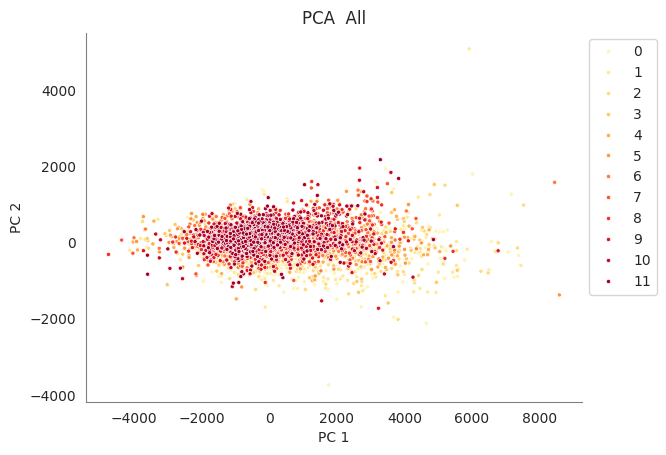

In [10]:
_, result = makePCA(df1,cmap)

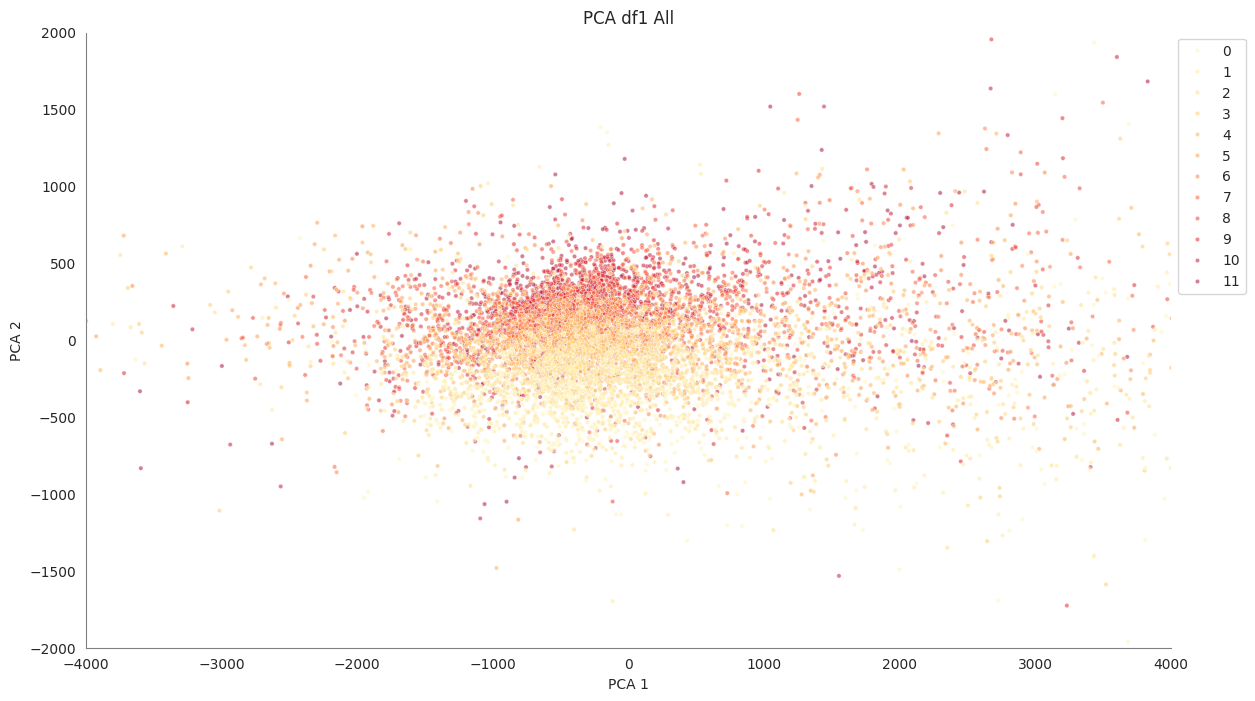

In [11]:
name = 'df1'
# Invert the order of results
results = result
results = results[::-1]
hue = results['Metadata_Site'].to_list()

fig = plt.figure(
figsize=[14, 8]
)
ax = fig.add_subplot(111)
ax.set_xlabel('PCA 1', fontsize = 10)
ax.set_ylabel('PCA 2', fontsize = 10)
ax.spines['top'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
sns.scatterplot(x=results['pc1'].to_list(),
                y=results['pc2'].to_list(),
                palette=cmap,
                hue=hue,
                marker='.',
                s=40, 
                alpha=0.5,
                ).set(title=f'PCA {name} All'
            )
ax.set_facecolor('w')
ax.get_legend().remove()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(-2000, 2000)
ax.set_xlim(-4000, 4000)
# if not os.path.exists(f'{OutputDir}/{statmet}'):
#     os.makedirs(f'{OutputDir}/{statmet}')
# plt.savefig(f'{OutputDir}/{statmet}/{name}_umap{nn}nn_{isSup}.png')

fig.savefig(
        "/share/data/analyses/christa/colopaint3D/spher_colo52_v1/5_RemoveNoise/PCA_HCT116_pp.{}".format(figformat), dpi=dpi, bbox_inches="tight"
        )

plt.show()
plt.close()

In [12]:
filename2 = filenames[1]
# df = pl.read_parquet(f'{feat_pp}/{filename}.parquet')
df2 = readData(filename2, feat_dir=feat_bk, filetype='parquet')
cmap = sns.color_palette("YlOrRd", n_colors=len(df2['Metadata_Site'].unique().to_list()))

/tmp/ipykernel_868709/2733699382.py:18: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(df['Metadata_cmpd_pathway'].map_elements(lambda name: oneHot(name, onehot_mapping)).alias('Metadata_onehot'))
/tmp/ipykernel_868709/2733699382.py:21: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(


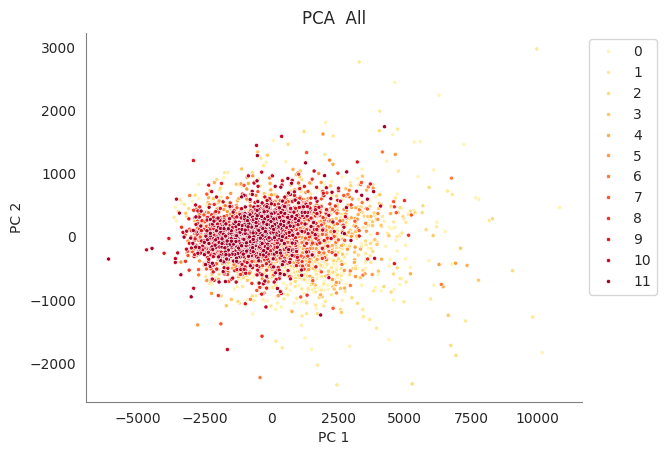

In [13]:
_,result = makePCA(df2,cmap)

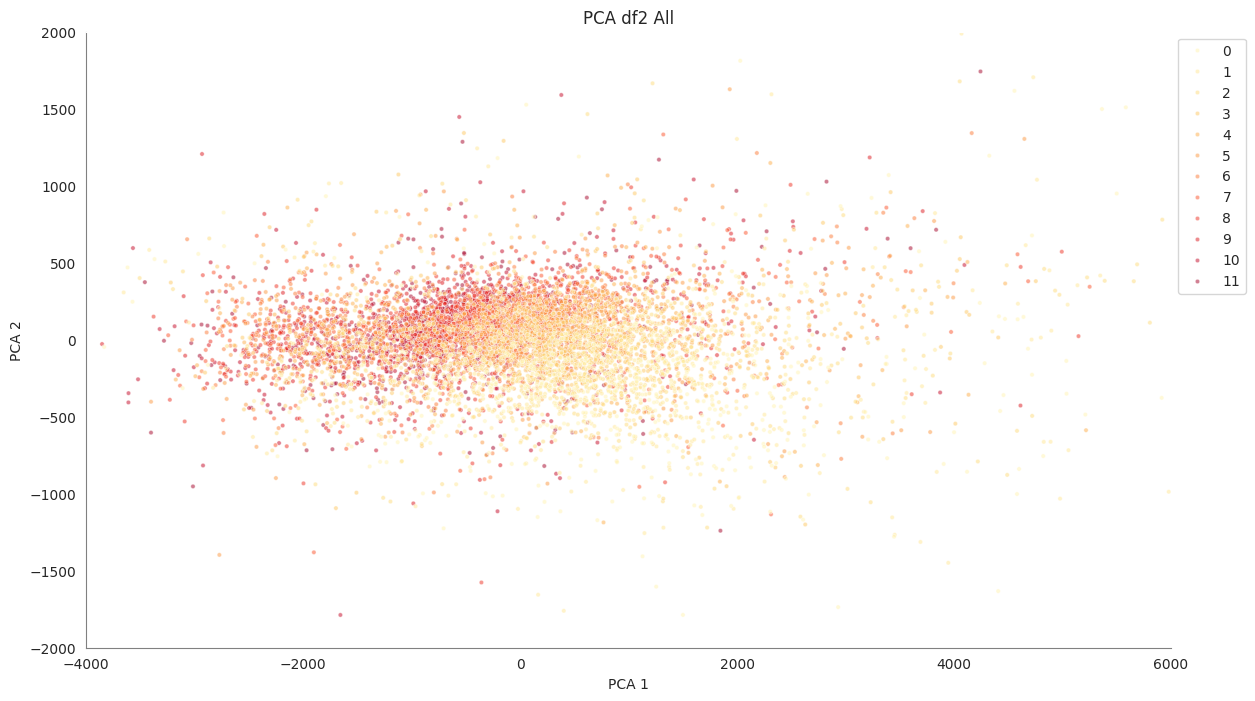

In [14]:
name = 'df2'
# Invert the order of results
results = result
results = results[::-1]
hue = results['Metadata_Site'].to_list()

fig = plt.figure(
figsize=[14, 8]
)
ax = fig.add_subplot(111)
ax.set_xlabel('PCA 1', fontsize = 10)
ax.set_ylabel('PCA 2', fontsize = 10)
ax.spines['top'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
sns.scatterplot(x=results['pc1'].to_list(),
                y=results['pc2'].to_list(),
                palette=cmap,
                hue=hue,
                marker='.',
                s=40, 
                alpha=0.5,
                ).set(title=f'PCA {name} All'
            )
ax.set_facecolor('w')
ax.get_legend().remove()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(-2000, 2000)
ax.set_xlim(-4000, 6000)
# if not os.path.exists(f'{OutputDir}/{statmet}'):
#     os.makedirs(f'{OutputDir}/{statmet}')
# plt.savefig(f'{OutputDir}/{statmet}/{name}_umap{nn}nn_{isSup}.png')

fig.savefig(
        "/share/data/analyses/christa/colopaint3D/spher_colo52_v1/5_RemoveNoise/PCA_HT29_pp.{}".format(figformat), dpi=dpi, bbox_inches="tight"
        )

plt.show()
plt.close()

In [15]:
filename3 = filenames[0]
# df = pl.read_parquet(f'{feat_pp}/{filename}.parquet')
df3 = readData(filename3, feat_dir=feat_pp, filetype='parquet')
cmap = sns.color_palette("YlOrRd", n_colors=len(df3['Metadata_Site'].unique().to_list()))

/tmp/ipykernel_868709/2733699382.py:18: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(df['Metadata_cmpd_pathway'].map_elements(lambda name: oneHot(name, onehot_mapping)).alias('Metadata_onehot'))
/tmp/ipykernel_868709/2733699382.py:21: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(


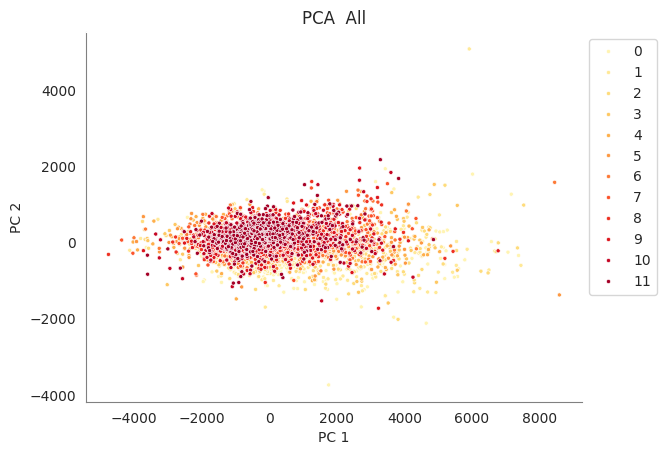

In [16]:
_,result = makePCA(df3,cmap)

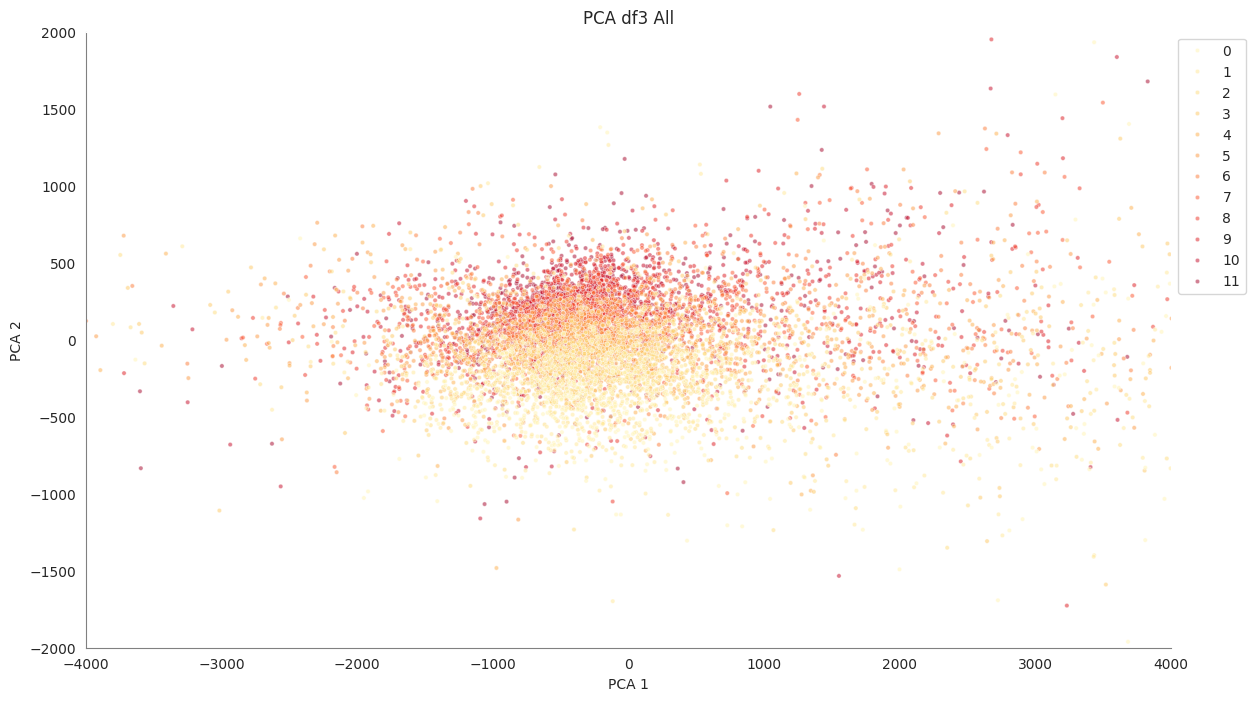

In [19]:
name = 'df3'
# Invert the order of results
results = result
results = results[::-1]
hue = results['Metadata_Site'].to_list()

fig = plt.figure(
figsize=[14, 8]
)
ax = fig.add_subplot(111)
ax.set_xlabel('PCA 1', fontsize = 10)
ax.set_ylabel('PCA 2', fontsize = 10)
ax.spines['top'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
sns.scatterplot(x=results['pc1'].to_list(),
                y=results['pc2'].to_list(),
                palette=cmap,
                hue=hue,
                marker='.',
                s=40, 
                alpha=0.5,
                ).set(title=f'PCA {name} All'
            )
ax.set_facecolor('w')
ax.get_legend().remove()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(-2000, 2000)
ax.set_xlim(-4000, 4000)
# if not os.path.exists(f'{OutputDir}/{statmet}'):
#     os.makedirs(f'{OutputDir}/{statmet}')
# plt.savefig(f'{OutputDir}/{statmet}/{name}_umap{nn}nn_{isSup}.png')

fig.savefig(
        "/share/data/analyses/christa/colopaint3D/spher_colo52_v1/5_RemoveNoise/PCA_HCT116_fe.{}".format(figformat), dpi=dpi, bbox_inches="tight"
        )

plt.show()
plt.close()

In [20]:
filename4 = filenames[1]
# df = pl.read_parquet(f'{feat_pp}/{filename}.parquet')
df4 = readData(filename4, feat_dir=feat_pp, filetype='parquet')
cmap = sns.color_palette("YlOrRd", n_colors=len(df4['Metadata_Site'].unique().to_list()))

/tmp/ipykernel_868709/2733699382.py:18: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(df['Metadata_cmpd_pathway'].map_elements(lambda name: oneHot(name, onehot_mapping)).alias('Metadata_onehot'))
/tmp/ipykernel_868709/2733699382.py:21: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(


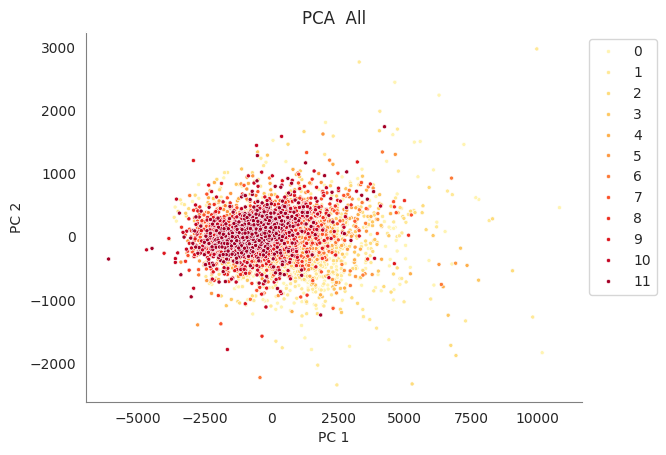

In [21]:
_,result = makePCA(df4,cmap)

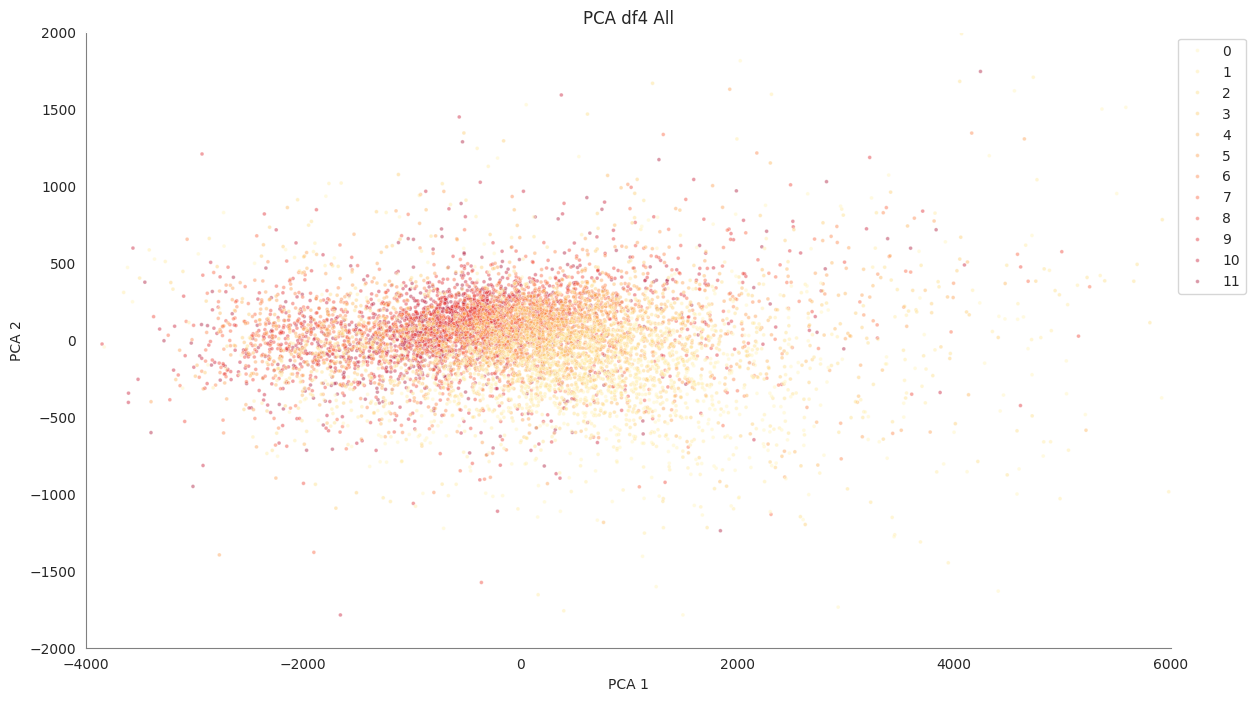

In [25]:
name = 'df4'
# Invert the order of results
results = result
results = results[::-1]
hue = results['Metadata_Site'].to_list()

fig = plt.figure(
figsize=[14, 8]
)
ax = fig.add_subplot(111)
ax.set_xlabel('PCA 1', fontsize = 10)
ax.set_ylabel('PCA 2', fontsize = 10)
ax.spines['top'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
sns.scatterplot(x=results['pc1'].to_list(),
                y=results['pc2'].to_list(),
                palette=cmap,
                hue=hue,
                marker='.',
                s=30, 
                alpha=0.4,
                ).set(title=f'PCA {name} All'
            )
ax.set_facecolor('w')
ax.get_legend().remove()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(-2000, 2000)
ax.set_xlim(-4000, 6000)
# if not os.path.exists(f'{OutputDir}/{statmet}'):
#     os.makedirs(f'{OutputDir}/{statmet}')
# plt.savefig(f'{OutputDir}/{statmet}/{name}_umap{nn}nn_{isSup}.png')

fig.savefig(
        "/share/data/analyses/christa/colopaint3D/spher_colo52_v1/5_RemoveNoise/PCA_HT29_fe.{}".format(figformat), dpi=dpi, bbox_inches="tight"
        )

plt.show()
plt.close()